# Day 1 – Introduction to AI & ML
---


## 1. What is AI, ML, and Deep Learning?

### 🔹 Artificial Intelligence (AI)
AI is the broad field of creating machines that can perform tasks that normally require human intelligence.
- **Examples:** Chatbots, recommendation systems, self-driving cars.

### 🔹 Machine Learning (ML)
A subset of AI where machines learn from **data** without being explicitly programmed.
- **Key Idea:** Learn patterns → Make predictions.
- **Examples:** Spam email detection, predicting house prices.

### 🔹 Deep Learning (DL)
A subset of ML that uses **neural networks with many layers** to learn complex patterns.
- **Examples:** Face recognition, voice assistants like Siri/Alexa, GPT models.





## 2. Types of Machine Learning

### 🔹 Supervised Learning
- Learn from **labeled data** (input + correct output).
- Goal: Predict new outputs given inputs.
- Example: Predicting house prices based on size, location.
- **Analogy:** A teacher gives you questions *and* the correct answers.

### 🔹 Unsupervised Learning
- Learn from **unlabeled data** (no output labels).
- Goal: Find hidden patterns/structure in data.
- Example: Customer segmentation (grouping customers by behavior).
- **Analogy:** Exploring a new city without a map.

### 🔹 Reinforcement Learning
- Learn by interacting with an environment → rewards & penalties.
- Goal: Learn the best sequence of actions.
- Example: Training a robot to walk, AlphaGo winning at Go.
- **Analogy:** A dog learns tricks by trial and error with treats.



## 3. Set Up Environment (Colab)

We’ll use Python libraries that are essential for ML:  
- **NumPy** → numerical operations  
- **Pandas** → data handling  
- **Matplotlib/Seaborn** → visualizations  
- **Scikit-learn** → machine learning algorithms


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(" Libraries loaded successfully!")


 Libraries loaded successfully!



## 4. First Hands-On Mini Project  

We’ll load a famous dataset, explore it, and visualize it.



### Step 1: Load Data  
We use the **Iris dataset**, a simple dataset containing flower measurements.  
- **Features (X):** sepal length, sepal width, petal length, petal width  
- **Target (y):** species of the flower (Setosa, Versicolor, Virginica)


In [ ]:

from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Show first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



### Step 2: Explore Data  
We check the dataset's structure and quality.


In [ ]:

# Shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Check for missing values
print(df.isnull().sum())

# Summary statistics
df.describe()


Shape of dataset: (150, 5)
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



### Step 3: Visualize Data  
Visualization helps us understand distributions and relationships between features.


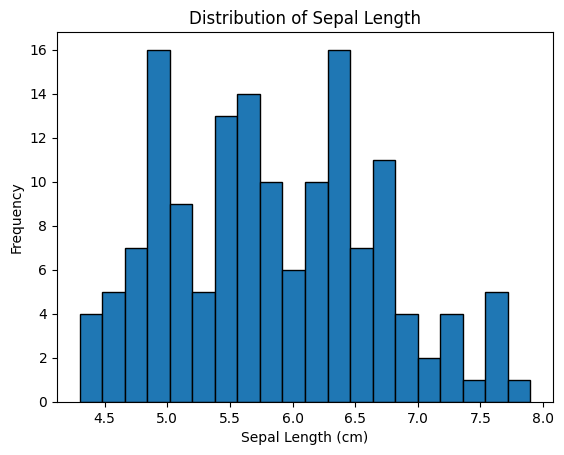

In [ ]:

# Histogram of sepal length
plt.hist(df['sepal length (cm)'], bins=20, edgecolor='black')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')
plt.show()


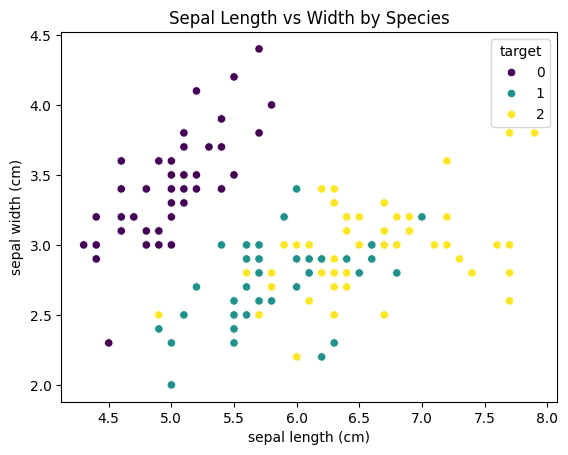

In [ ]:

# Scatter plot with labels
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df, palette='viridis')
plt.title('Sepal Length vs Width by Species')
plt.show()



#  Advanced Add-On for Day 1  

Now let’s go one step further: train your first ML model.



### Step 1: Train-Test Split  
We split data into **training** (80%) and **testing** (20%) sets.  
- Training set → used to "teach" the model.  
- Test set → used to check how well the model generalizes.


In [ ]:

from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (120, 4)
Test shape: (30, 4)



### Step 2: Train Logistic Regression  
Logistic Regression is a simple yet powerful model for classification problems.


In [ ]:

from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(max_iter=200)

# Train on training set
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)


### Step 3: Make Predictions  
The model predicts flower species for the test set.


In [ ]:

# Predict on test set
y_pred = model.predict(X_test)

print("Predictions:", y_pred[:10])
print("Actual:", y_test.values[:10])


Predictions: [1 0 2 1 1 0 1 2 1 1]
Actual: [1 0 2 1 1 0 1 2 1 1]



### Step 4: Evaluate Model  
We use **accuracy** and a **classification report** to measure performance.  
- Accuracy → % of correct predictions  
- Precision, Recall, F1-score → deeper evaluation metrics


In [ ]:

from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", accuracy)

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


✅ Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




### Step 5: Visualize with PCA  
We use Principal Component Analysis (PCA) to reduce features to 2D for visualization.  
This helps us see natural clusters of the flowers.


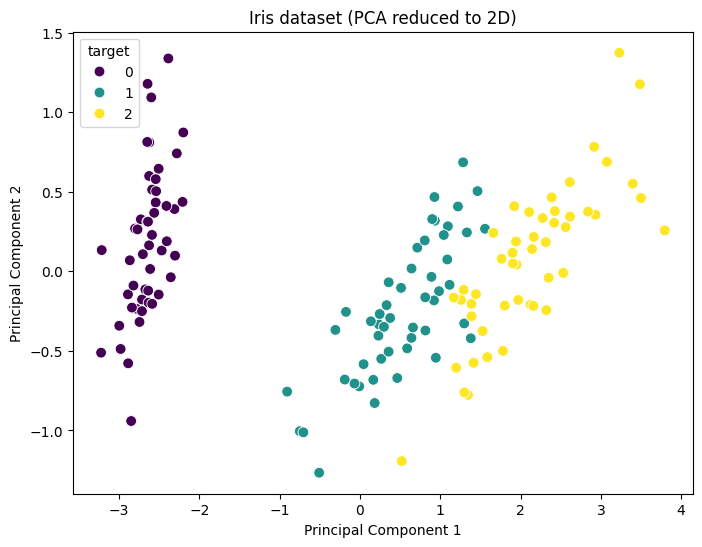

In [ ]:

from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis', s=60)
plt.title("Iris dataset (PCA reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



## 6. Reflection  

- **What you learned:** Difference between AI, ML, DL; types of ML.  
- **What you did:** Ran first dataset analysis, created visualizations, trained your first ML model.  


**End of Day 1:** You now understand the basics of AI/ML and successfully trained & evaluated your first ML model in Colab!
